# Projeto Turma 970 - Machine Learning I

Aluno: Joelson Ferreira (https://www.linkedin.com/in/joelsons/)

Professor: Igor Garcia (https://www.linkedin.com/in/igorgbs/)

O objetivo deste projeto é aplicar técnicas de Machine Learning para determinar se o sujeito vai ter ou não avc a partir de uma base de dados fornecida.

O conjunto de dados utilizado para este projeto é "Stroke Prediction Dataset" (Previsão de AVC), disponível no Kaggle: https://www.kaggle.com/competitions/playground-series-s3e2/data?select=train.csv.

As colunas desse dataset são:

- id (id): Identificador único
- gender (gênero): "Male" (Masculino), "Female" (Feminino) or "Other" (Outro);
- age (idade): idade do paciente;
- hypertension (hipertensão): 0 se o paciente não tiver hipertensão, 1 se o paciente tiver hipertensão
- heart_disease (doença cardíaca): 0 se o paciente não tiver nenhuma doença cardíaca, 1 se o paciente tiver uma doença cardíaca;
- ever_married (casado): "No" or "Yes";
- work_type (tipo de trabalho): "children" (criança), "Govt_jov" (Servidor público), "Never_worked" (Nunca_trabalhou), "Private" (Empresa Privada) ou "Self-employed" (Autônomo);
- Residence_type (Tipo de residência): “Rural" ou “Urban" (Urbano);
- avg_glucose_level: Nível médio de glicose no sangue;
- bmi (IMC): índice de massa corporal;
- smoking_status (condição de fumante): “formerly smoked" (ex-fumante), “never smoked" (nunca fumou), “smokes" (fuma) ou “Unknown" (Desconhecido);
- stroke (acidente vascular cerebral): 1 se o paciente teve acidente vascular cerebral ou 0 se não.

## Análise exploratória de dados

### Importações

In [1]:
# Importando o pandas
import pandas as pd
# Importando o matplotlib
import matplotlib.pyplot as plt
# Importando o Numpy - linear algebra
import numpy as np 
# Importanto o seaborn
import seaborn as sns

In [2]:
# Importando a base de dados
base = pd.read_csv('train.csv')

### Visualização e tratamentos da base

In [3]:
display(base)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


In [4]:
# Verificando as informações 
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [5]:
# Verificando as informações estatísticas das colunas numéricas
base.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [6]:
# Verificando a quantidade de valores diferentes na base (cardinalidade)
base.nunique()

id                   15304
gender                   3
age                    106
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level     3740
bmi                    407
smoking_status           4
stroke                   2
dtype: int64

Removendo a coluna "id"

In [7]:
# Excluindo a coluna "Residence_type"

base = base.drop('id', axis=1)

Tratando a coluna Idade e as crianças na base

In [8]:
# Menor valor de idade

base.age.min()

0.08

In [9]:
# Verificando a lista de idades menor que 1. A maioria são crianças.

base[base['age'] < 1].sort_values(by=['age'])

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4738,Male,0.08,0,0,No,children,Urban,72.01,19.5,Unknown,0
3137,Male,0.08,0,0,No,children,Urban,75.93,14.8,Unknown,0
3071,Male,0.08,0,0,No,children,Rural,73.33,17.4,Unknown,0
7579,Male,0.08,0,0,No,children,Rural,80.08,18.1,Unknown,0
4155,Female,0.08,0,0,Yes,Private,Urban,79.33,33.2,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
5999,Female,0.88,0,0,No,children,Urban,100.61,14.6,Unknown,0
14183,Male,0.88,0,0,No,children,Rural,73.29,14.1,Unknown,0
11351,Female,0.88,0,0,No,children,Rural,55.51,17.0,Unknown,0
14869,Female,0.88,0,0,No,children,Rural,100.41,20.5,Unknown,0


In [10]:
# Como o objeto de análise é AVC e sabendo que é raro em crianças, iremos descartar essas linhas
base[base['work_type'] == 'children'].sort_values(by=['stroke'], ascending=False)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3226,Male,10.00,0,0,No,children,Urban,93.28,18.4,Unknown,1
12,Female,4.00,0,0,No,children,Urban,84.10,14.1,Unknown,0
10244,Male,0.24,0,0,No,children,Urban,70.13,18.8,Unknown,0
10300,Female,8.00,0,0,No,children,Rural,85.98,16.0,Unknown,0
10293,Female,8.00,0,0,No,children,Urban,96.01,25.5,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
4994,Male,10.00,0,0,No,children,Urban,59.59,16.9,Unknown,0
4991,Female,11.00,0,0,No,children,Urban,94.39,20.1,Unknown,0
4987,Male,12.00,0,0,No,children,Urban,80.93,22.7,Unknown,0
4984,Male,2.00,0,0,No,children,Rural,112.92,18.2,Unknown,0


In [11]:
# Excluindo as crianças da base
base = base.drop(base[base['work_type'] == 'children'].index)


In [12]:
# Verificando a lista de idades até 12 anos. Não são crianças devido a coluna "work_type". Algumas té já casaram.

base[base['age'] <= 12].sort_values(by=['age'])

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4155,Female,0.08,0,0,Yes,Private,Urban,79.33,33.2,Unknown,0
3302,Female,0.56,0,0,No,Private,Rural,109.10,20.0,Unknown,0
10126,Male,1.08,0,0,No,Never_worked,Rural,104.75,20.6,Unknown,0
11915,Female,1.32,0,0,No,Self-employed,Rural,85.93,17.6,Unknown,0
8102,Female,1.32,1,0,Yes,Self-employed,Urban,167.41,33.6,never smoked,0
9188,Male,1.88,0,0,No,Private,Rural,100.74,18.0,Unknown,0
963,Female,2.00,0,0,No,Private,Urban,125.68,25.1,never smoked,0
1574,Female,5.00,0,0,No,Private,Rural,92.48,16.6,Unknown,0
13115,Female,5.00,0,0,No,Private,Rural,100.52,16.7,Unknown,0
9068,Female,5.00,0,0,Yes,Private,Rural,108.14,23.1,never smoked,0


In [13]:
# Como não são crianças, iremos substituir as idades pela média das idades maiores que 12
idade_maior_que_12 = base[base['age'] > 12]
media_idades = int(idade_maior_que_12['age'].mean())
media_idades

46

In [14]:
# Realizando a substituição
base.loc[base['age'] <= 12, 'age'] = media_idades

In [15]:
# Vemos que a idade foi corrigida
base.age.unique()

array([28., 33., 42., 56., 24., 34., 53., 78., 45., 62., 51., 23., 36.,
       59., 40., 47., 31., 71., 50., 55., 38., 57., 61., 48., 17., 58.,
       26., 39., 52., 19., 54., 72., 15., 76., 82., 18., 74., 43., 21.,
       65., 80., 68., 44., 32., 25., 79., 63., 81., 60., 49., 70., 73.,
       20., 46., 37., 67., 29., 69., 30., 14., 75., 22., 27., 77., 35.,
       66., 41., 64., 16., 13.])

Tratando a coluna avg_glucose_level

- O estado de normalidade da glicemia em jejum é de 70 mg/dl a 100 mg/ld.
- Uma pessoa é classificada como pré-diabética ao medir a sua glicemia em jejum e atingir entre 100 e 125 mg/dl.
- Já aqueles que atingem a partir de 126 mg/dl são considerados diabéticos.

Fonte: https://www.tjdft.jus.br/informacoes/programas-projetos-e-acoes/pro-vida/dicas-de-saude/pilulas-de-saude/voce-sabe-o-que-e-a-pre-diabetes-entenda-tudo-sobre-o-assunto#:~:text=O%20estado%20de%20normalidade%20da,Quais%20as%20principais%20causas%3F

In [16]:
# Vamos categorizar o nível de glicose: 1 -> Baixa, 2 -> Normal, 3 - Pré-diabética e 4 -> Diabética

base['glucose_level'] = base.avg_glucose_level.apply(lambda x: 1 if x < 70 else (2 if x <= 100 else (3 if x <= 125 else 4)))

# Removendo a coluna 'avg_glucose_level'
base = base.drop('avg_glucose_level', axis=1)

In [17]:
display(base)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,stroke,glucose_level
0,Male,28.0,0,0,Yes,Private,Urban,31.1,never smoked,0,2
1,Male,33.0,0,0,Yes,Private,Rural,23.9,formerly smoked,0,2
2,Female,42.0,0,0,Yes,Private,Rural,40.3,Unknown,0,3
3,Male,56.0,0,0,Yes,Private,Urban,28.8,never smoked,0,1
4,Female,24.0,0,0,No,Private,Rural,28.8,never smoked,0,2
...,...,...,...,...,...,...,...,...,...,...,...
15299,Female,22.0,0,0,No,Govt_job,Urban,19.5,never smoked,0,2
15300,Female,46.0,1,0,Yes,Private,Urban,32.1,never smoked,0,3
15301,Female,75.0,0,0,Yes,Self-employed,Urban,26.2,never smoked,0,2
15302,Male,46.0,0,0,Yes,Private,Rural,22.5,Unknown,0,3


Tratando a coluna gender

In [18]:
base.gender.value_counts()

gender
Female    8433
Male      4833
Name: count, dtype: int64

In [19]:
# Vamos categorizar: 0 -> Female e 1 -> Male

base['is_male'] = base.gender.apply(lambda x: 1 if x=='Male' else 0)


In [20]:
# Removendo a coluna 'gender'
base = base.drop('gender', axis=1)

Tratando a coluna "ever_married"

In [21]:
# Contando os valores unicos na coluna "ever_married"

base.ever_married.value_counts()

ever_married
Yes    10383
No      2883
Name: count, dtype: int64

In [22]:
# Criando uma nova coluna 'married' com '0 -> não' e '1 -> sim'

base['married'] = base.ever_married.apply(lambda x: 1 if x=='Yes' else 0)

In [23]:
# Agrupando para verificar se todos os dados da nova coluna estão corretos

base[['ever_married','married']].value_counts()

ever_married  married
Yes           1          10383
No            0           2883
Name: count, dtype: int64

In [24]:
# Excluindo a coluna "ever_married"

base = base.drop('ever_married', axis=1)

Tratando a coluna "Residence_type"

In [25]:
# Contando os valores unicos na coluna "Residence_type"

base.Residence_type.value_counts()

Residence_type
Urban    6643
Rural    6623
Name: count, dtype: int64

In [26]:
# Criando uma nova coluna 'residence_urban' com '1 -> sim' e '0 -> não'

base['residence_urban'] = base.Residence_type.apply(lambda x: 1 if x=='Urban' else 0)

In [27]:
# Agrupando para verificar se todos os dados da nova coluna estão corretos

base[['Residence_type','residence_urban']].value_counts()

Residence_type  residence_urban
Urban           1                  6643
Rural           0                  6623
Name: count, dtype: int64

In [28]:
# Excluindo a coluna "Residence_type"

base = base.drop('Residence_type', axis=1)

Tratando a coluna "work_type"

In [29]:
# Contando as entradas na coluna "work_type"

base.work_type.value_counts()

work_type
Private          9752
Self-employed    1939
Govt_job         1533
Never_worked       42
Name: count, dtype: int64

In [30]:
# Renomeando as entradas na coluna "work_type"

base['work_type'] = base['work_type'].replace('Private', 1)
base['work_type'] = base['work_type'].replace('Self-employed', 2)
base['work_type'] = base['work_type'].replace('Govt_job', 3)
base['work_type'] = base['work_type'].replace('Never_worked', 4)

In [31]:
# Contando as entradas na coluna "work_type"

base.work_type.value_counts()

work_type
1    9752
2    1939
3    1533
4      42
Name: count, dtype: int64

Tratando a coluna "smoking_status"

In [32]:
# Contando as entradas na coluna "smoking_status"

base.smoking_status.value_counts()

smoking_status
never smoked       6151
Unknown            2661
formerly smoked    2314
smokes             2140
Name: count, dtype: int64

In [33]:
# Renomeando as entradas na coluna "smoking_status"

base['smoking_status'] = base['smoking_status'].replace('never smoked', 1)
base['smoking_status'] = base['smoking_status'].replace('Unknown', 2)
base['smoking_status'] = base['smoking_status'].replace('formerly smoked', 3)
base['smoking_status'] = base['smoking_status'].replace('smokes', 4)


In [34]:
# Contando as entradas na coluna "smoking_status"

base.smoking_status.value_counts()

smoking_status
1    6151
2    2661
3    2314
4    2140
Name: count, dtype: int64

Categorizando a coluna "bmi"

- Menor que 18,5	Baixo peso
- De 18,5 a 24,9	Peso normal
- De 25 a 29,9	Sobrepeso
- De 30 a 34,9	Obesidade grau I
- De 35 a 39.9	Obesidade grau II
- Igual ou maior que 40	Obesidade grau III

Fonte: https://www.tuasaude.com/imc/

In [35]:
# Vamos categorizar o nível de glicose: 1 -> Baixo peso, 2 -> Normal, 3 - Sobrepeso e 4 -> Obesidade

base['imc'] = base.bmi.apply(lambda x: 1 if x < 18.5 else (2 if x <= 24.9 else (3 if x <= 29.9 else 4)))

# Removendo a coluna 'avg_glucose_level'
base = base.drop('bmi', axis=1)

Tratando os tipos

In [36]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13266 entries, 0 to 15303
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              13266 non-null  float64
 1   hypertension     13266 non-null  int64  
 2   heart_disease    13266 non-null  int64  
 3   work_type        13266 non-null  int64  
 4   smoking_status   13266 non-null  int64  
 5   stroke           13266 non-null  int64  
 6   glucose_level    13266 non-null  int64  
 7   is_male          13266 non-null  int64  
 8   married          13266 non-null  int64  
 9   residence_urban  13266 non-null  int64  
 10  imc              13266 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 1.2 MB


In [37]:
# Convertendo int64 em int32 em toda a base

base = base.astype('int32')

Visão final

In [38]:
base.head()

,age,hypertension,heart_disease,work_type,smoking_status,stroke,glucose_level,is_male,married,residence_urban,imc
0,28,0,0,1,1,0,2,1,1,1,4
1,33,0,0,1,3,0,2,1,1,0,2
2,42,0,0,1,2,0,3,0,1,0,4
3,56,0,0,1,1,0,1,1,1,1,3
4,24,0,0,1,1,0,2,0,0,0,3


In [39]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13266 entries, 0 to 15303
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              13266 non-null  int32
 1   hypertension     13266 non-null  int32
 2   heart_disease    13266 non-null  int32
 3   work_type        13266 non-null  int32
 4   smoking_status   13266 non-null  int32
 5   stroke           13266 non-null  int32
 6   glucose_level    13266 non-null  int32
 7   is_male          13266 non-null  int32
 8   married          13266 non-null  int32
 9   residence_urban  13266 non-null  int32
 10  imc              13266 non-null  int32
dtypes: int32(11)
memory usage: 673.7 KB


In [40]:
# Verificando a quantidade de valores diferentes na base (cardinalidade)
base.nunique()

age                70
hypertension        2
heart_disease       2
work_type           4
smoking_status      4
stroke              2
glucose_level       4
is_male             2
married             2
residence_urban     2
imc                 4
dtype: int64

In [41]:
display(base)

,age,hypertension,heart_disease,work_type,smoking_status,stroke,glucose_level,is_male,married,residence_urban,imc
0,28,0,0,1,1,0,2,1,1,1,4
1,33,0,0,1,3,0,2,1,1,0,2
2,42,0,0,1,2,0,3,0,1,0,4
3,56,0,0,1,1,0,1,1,1,1,3
4,24,0,0,1,1,0,2,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
15299,22,0,0,3,1,0,2,0,0,1,2
15300,46,1,0,1,1,0,3,0,1,1,4
15301,75,0,0,2,1,0,2,0,1,1,3
15302,46,0,0,1,2,0,3,1,1,0,2


### Gráficos

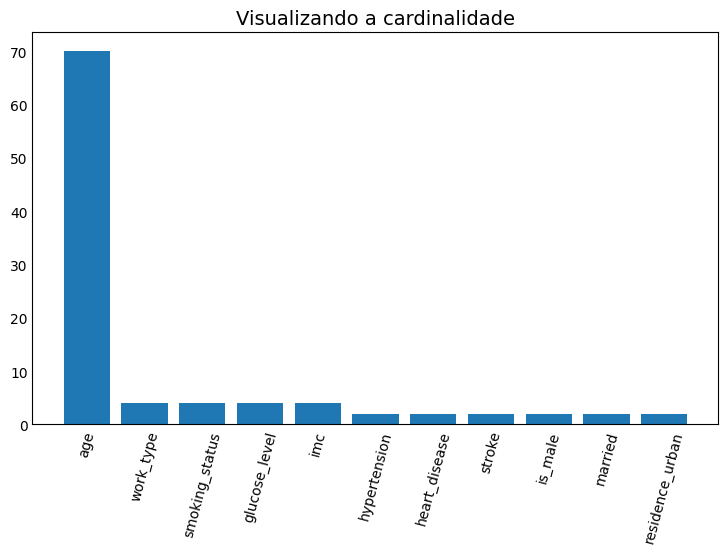

In [167]:
# Visualizando a cardinalidade de forma gráfica

fig, ax = plt.subplots(figsize=(7,4))

ax.bar(base.nunique().sort_values(ascending=False).index, base.nunique().sort_values(ascending=False).values)

ax.tick_params(axis='x',labelrotation=75)

ax.set_title('Visualizando a cardinalidade', fontsize=14)
plt.grid(False)

plt.show()

Verificando a coluna "age"

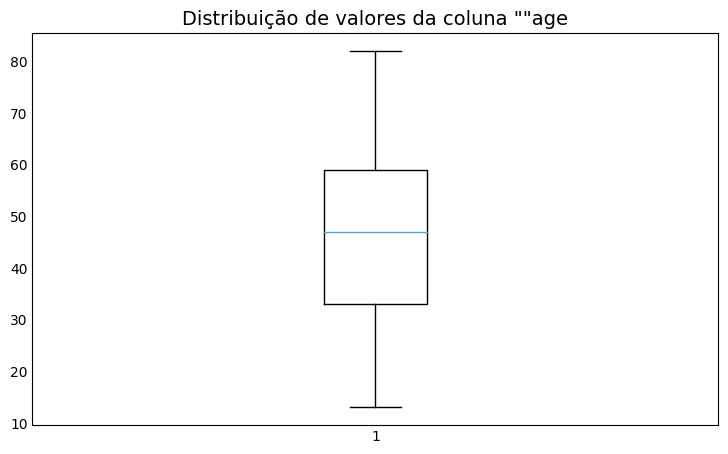

In [166]:
# Verificando a coluna "age" (idade)
fig, ax = plt.subplots(figsize=(7,4))

ax.boxplot(base.age)
ax.set_title('Distribuição de valores da coluna ""age', fontsize=14)
plt.grid(False)
plt.show()

In [44]:
# Verificando a coluna "bmi" (IMC: índice de massa corporal) com "describe()".
base.age.describe()

count    13266.000000
mean        46.856400
std         17.537827
min         13.000000
25%         33.000000
50%         47.000000
75%         59.000000
max         82.000000
Name: age, dtype: float64

Visualizando a coluna "is_male"

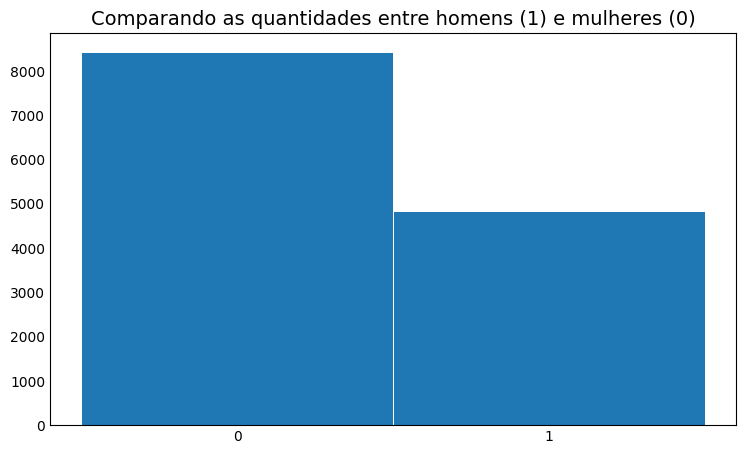

In [165]:
# Comparando as quantidades "is_male"
fig, ax = plt.subplots(figsize=(7,4))

x=base.is_male.value_counts().index.astype('str')
y=base.is_male.value_counts().values

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
ax.set_title('Comparando as quantidades entre homens (1) e mulheres (0)', fontsize=14)
plt.grid(False)

plt.show()

Visualizando a coluna "hypertension"

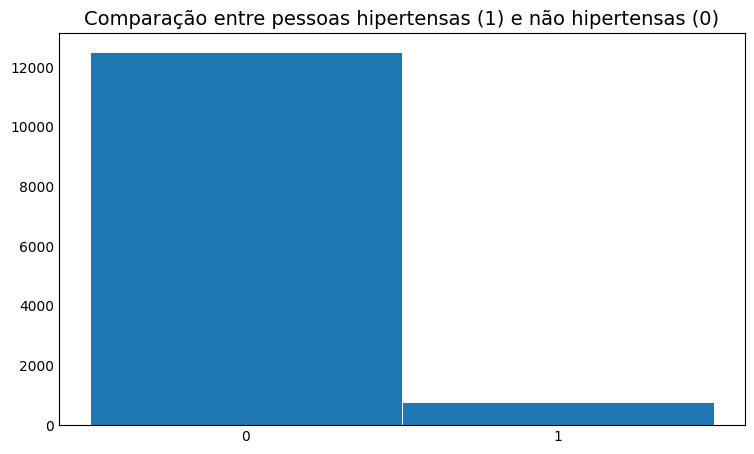

In [164]:
# Comparando as quantidades "hypertension"
fig, ax = plt.subplots(figsize=(7,4))

x=base.hypertension.value_counts().index.astype('str')
y=base.hypertension.value_counts().values

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
ax.set_title('Comparação entre pessoas hipertensas (1) e não hipertensas (0)', fontsize=14)
plt.grid(False)

plt.show()

Visualizando a coluna "heart_disease"

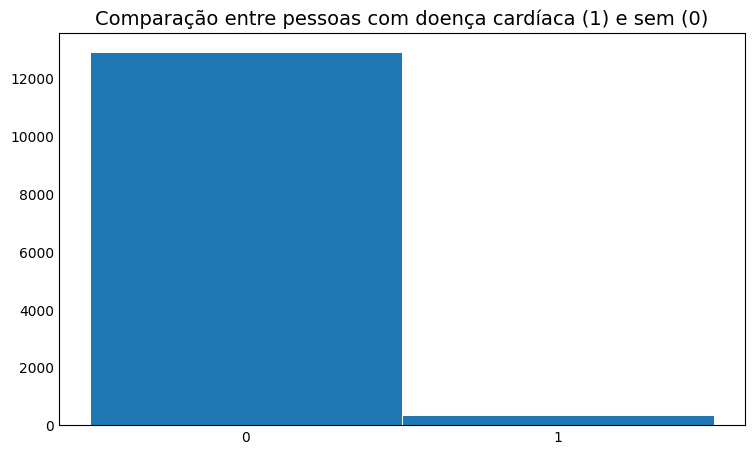

In [168]:
# Comparando as quantidades "heart_disease" (doença cardíaca)
fig, ax = plt.subplots(figsize=(7,4))

x=base.heart_disease.value_counts().index.astype('str')
y=base.heart_disease.value_counts().values

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
ax.set_title('Comparação entre pessoas com doença cardíaca (1) e sem (0)', fontsize=14)
plt.grid(False)

plt.show()

Visualizando a coluna "married"

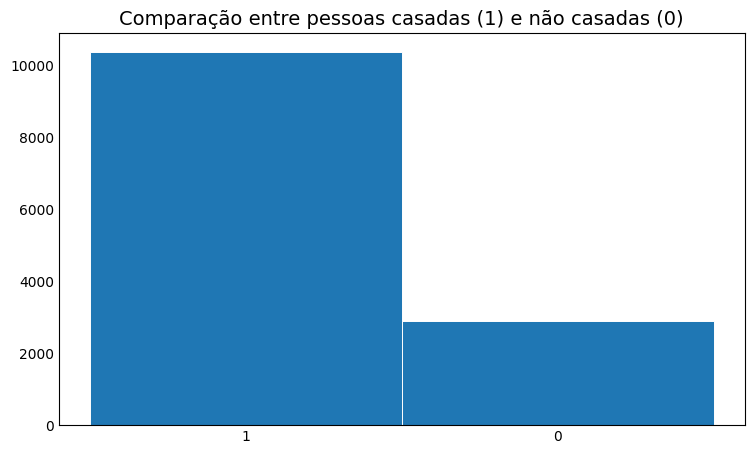

In [169]:
# Comparando as quantidades "married"
fig, ax = plt.subplots(figsize=(7,4))

x=base.married.value_counts().index.astype('str')
y=base.married.value_counts().values

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
ax.set_title('Comparação entre pessoas casadas (1) e não casadas (0)', fontsize=14)
plt.grid(False)

plt.show()

Visualizando a coluna "work_type"

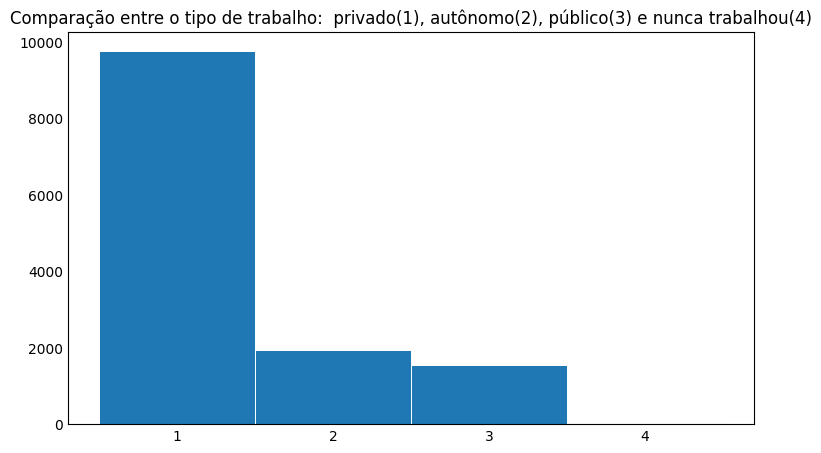

In [172]:
# Comparando as quantidades "work_type" (tipo_trabalho)
fig, ax = plt.subplots(figsize=(7,4))

x=base.work_type.value_counts().index.astype('str')
y=base.work_type.value_counts().values

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
ax.set_title('Comparação entre o tipo de trabalho:  privado(1), autônomo(2), público(3) e nunca trabalhou(4)', fontsize=12)
plt.grid(False)

plt.show()

Visualizando a coluna "residence_urban"

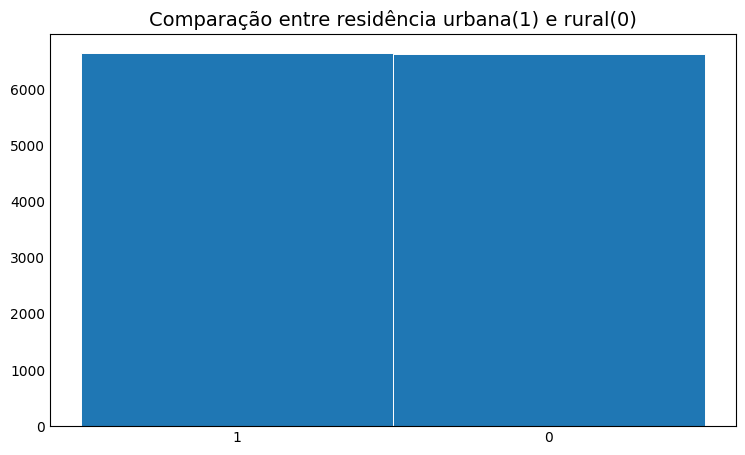

In [174]:
# Comparando as quantidades "residence_urban" (Tipo_residência)
fig, ax = plt.subplots(figsize=(7,4))

x=base.residence_urban.value_counts().index.astype('str')
y=base.residence_urban.value_counts().values

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
ax.set_title('Comparação entre residência urbana(1) e rural(0)', fontsize=14)
plt.grid(False)

plt.show()

In [51]:
base.residence_urban.value_counts().values

array([6643, 6623], dtype=int64)

Visualizando a coluna "smoking_status"

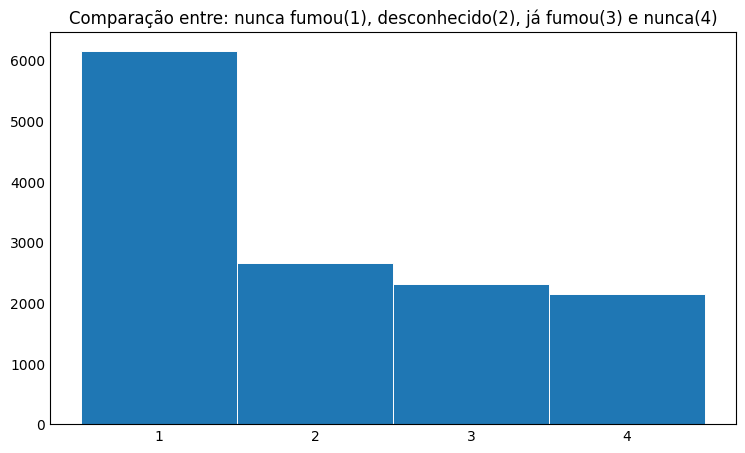

In [177]:
# Comparando as quantidades "smoking_status" (condição de fumante)
fig, ax = plt.subplots(figsize=(7,4))

x=base.smoking_status.value_counts().index.astype('str')
y=base.smoking_status.value_counts().values

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
ax.set_title('Comparação entre: nunca fumou(1), desconhecido(2), já fumou(3) e nunca(4)', fontsize=12)
plt.grid(False)

plt.show()

Visualizando a coluna "stroke"

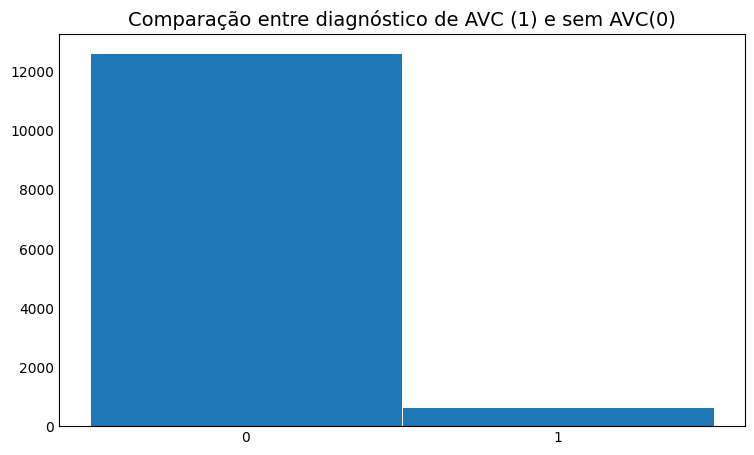

In [178]:
# Comparando as quantidades "stroke" (acidente vascular cerebral)
fig, ax = plt.subplots(figsize=(7,4))

x=base.stroke.value_counts().index.astype('str')
y=base.stroke.value_counts().values

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
ax.set_title('Comparação entre diagnóstico de AVC (1) e sem AVC(0)', fontsize=14)
plt.grid(False)

plt.show()

In [54]:
base.stroke.value_counts().values


array([12635,   631], dtype=int64)

Matriz de correlação

In [182]:
# Utilizando o seaborn criar uma matriz para mostrar a correlação de cada par de variáveis

sns.pairplot(base,hue="stroke") # Kernel Density Estimation - Mede a chance de uma variável aleatória assumir determinado valor
plt.title("Matriz para mostrar a correlação de cada par de variáveis")
plt.show()

### Heatmap de correlação

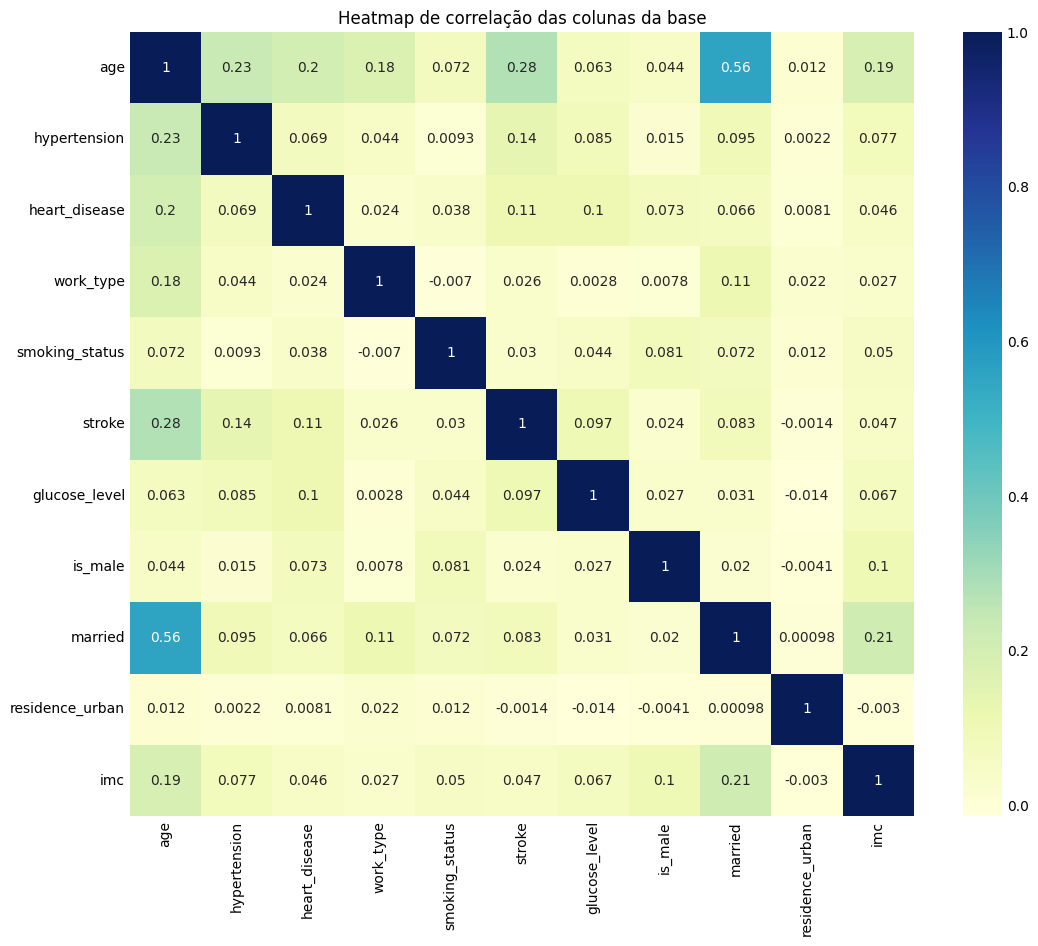

In [181]:
# Verificando a correlação dos dados numéricos usando mapa de calor
# Atenção: correlação não implica em causalidade


plt.figure(figsize=(10, 8))

#sns.heatmap(base.corr(),annot=True,cmap='YlGnBu', fmt=".1f", linewidths=.1)
sns.heatmap(base.corr(), annot=True, cmap='YlGnBu', )
plt.title("Heatmap de correlação das colunas da base")
plt.show()

### Pandas Profiling

In [57]:
# Importação
from ydata_profiling import ProfileReport

# Gerando o relatório
profile = ProfileReport(base, title="Pandas Profiling Report")

# Visualizar o relatório
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Machine Learning

Após analisar a base de dados e o problema que temos para resolver, concluimos que trabalharemos com o Aprendizado de Máquina Supervisionado, pois os rótulos (target) estão bem definidos na base, na categoria de Classisicação (vai ter ou não avc).

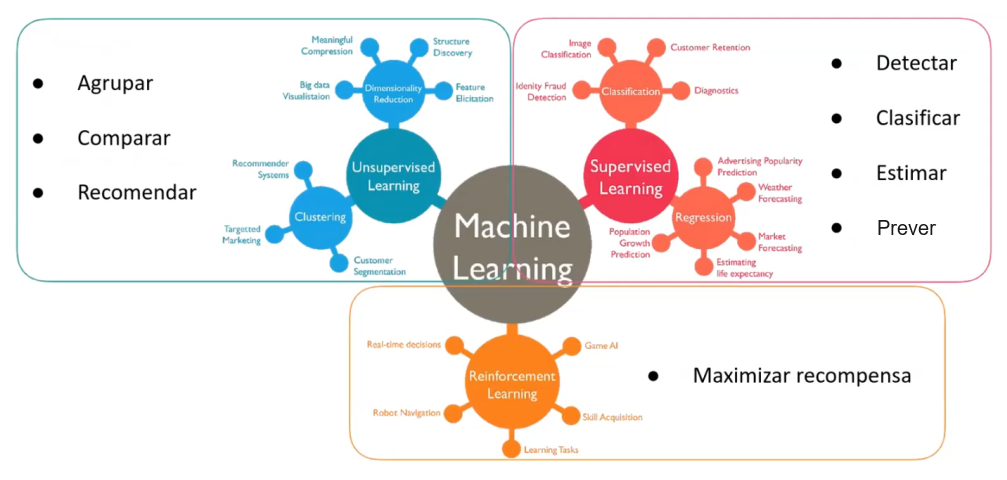

FONTE: https://keepcoding.io/blog/tipos-de-machine-learning/

In [58]:
base.head()

,age,hypertension,heart_disease,work_type,smoking_status,stroke,glucose_level,is_male,married,residence_urban,imc
0,28,0,0,1,1,0,2,1,1,1,4
1,33,0,0,1,3,0,2,1,1,0,2
2,42,0,0,1,2,0,3,0,1,0,4
3,56,0,0,1,1,0,1,1,1,1,3
4,24,0,0,1,1,0,2,0,0,0,3


**Escolha dos Algorítmos**

Para classificar a base prevendo se os indivíduos terão ou não AVC, usaremos os seguintes algorítmos:

- Perceptron
- Decision Trees (classificação)
- Regressão Logística
- Linear Support Vector Classification (LinearSVC)

Separando os dados em treino e teste

In [59]:
# Definindo os valores de X e y do modelo

X = base.drop('stroke', axis=1)
y = base.stroke                     # Nosso target (alvo) será a coluna stroke (AVC)

In [60]:
X.head()

,age,hypertension,heart_disease,work_type,smoking_status,glucose_level,is_male,married,residence_urban,imc
0,28,0,0,1,1,2,1,1,1,4
1,33,0,0,1,3,2,1,1,0,2
2,42,0,0,1,2,3,0,1,0,4
3,56,0,0,1,1,1,1,1,1,3
4,24,0,0,1,1,2,0,0,0,3


In [61]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: stroke, dtype: int32

In [62]:
#Importando o "train_test_split"
from sklearn.model_selection import train_test_split

# Criando o conjunto de dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)   # 30% dos dados para teste

In [63]:
# Conferindo o tamanho da base
base.shape

(13266, 11)

### **Algorítimos de classificação**

#### Perceptron

https://scikit-learn.org/stable/modules/linear_model.html#perceptron

In [64]:
# Importando o Perceptron
from sklearn.linear_model import Perceptron

# Criação do modelo
clf_perc = Perceptron()

# Treinando o modelo com os dados
clf_perc.fit(X_train, y_train)          # ajuste da reta - Tenta encontrar o melhor reta que separa os dados

Perceptron()

In [65]:
# Avaliando o modelo: aplicando a base X_train e verificando se as saídas coincidem com y_train
acuracia_perc = clf_perc.score(X_train, y_train) * 100
print("Acurácia: ", acuracia_perc)

Acurácia:  42.13870342451001


In [66]:
# Importação accuracy_score
#from sklearn.metrics import accuracy_score

# Aplicando o modelo nos dados de teste
previsoes_perc = clf_perc.predict(X_test)

# Avaliando o modelo
# accuracy_score(y_test, previsoes_perc) * 100


In [67]:
# w1 e w2 - Retorna 2 valores que multiplica cada coluna passada para o modelo
clf_perc.coef_

array([[  87.,  300.,  114., -399., -102.,  -20.,  -68., -392., -206.,
        -515.]])

In [68]:
# W0 - Valor que será sempre fixo
clf_perc.intercept_

array([-606.])

#### Decision Trees (Classification)

https://scikit-learn.org/stable/modules/tree.html

In [69]:
# Importando a árvore de decisao
from sklearn import tree

# Criação do classificador (modelo)
clf_tree = tree.DecisionTreeClassifier()

# Treinando o modelo com os dados
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [70]:
# Avaliando o modelo: aplicando a base X_train e verificando se as saídas coincidem com y_train
acuracia_tree = clf_tree.score(X_train, y_train) * 100
print("Acurácia: ", acuracia_tree)

Acurácia:  98.7400387680379


In [71]:
# Aplicando o modelo nos dados de teste
previsoes_tree = clf_tree.predict(X_test)
previsoes_tree



array([0, 0, 0, ..., 0, 0, 0])

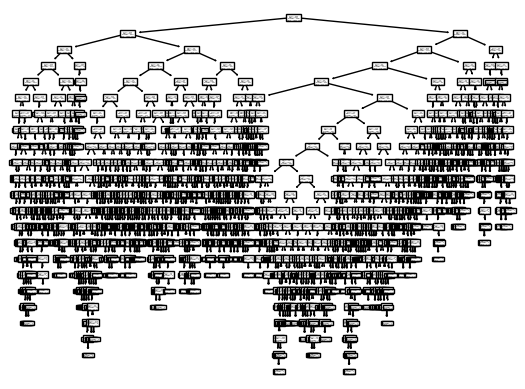

In [72]:
# Visualizando a árvore de decisão
tree.plot_tree(clf_tree);

#### Logistic Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [73]:
# Importando a Regrassão Logística
from sklearn.linear_model import LogisticRegression

# Criando o classificador e o fit com os dados
clf_logist = LogisticRegression(max_iter=1000, random_state=42).fit(X_train, y_train)

In [74]:
# Avaliando o modelo: aplicando a base X_train e verificando se as saídas coincidem com y_train
acuracia_logist = clf_logist.score(X_train, y_train) * 100
print("Acurácia: ", acuracia_logist)

Acurácia:  95.03553736808098


In [75]:
# Aplicando o modelo nos dados de teste
previsoes_logist = clf_logist.predict(X_test)
previsoes_tree

array([0, 0, 0, ..., 0, 0, 0])

#### Linear Support Vector Classification (LinearSVC)

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

In [76]:
# Importação do LinearSVC
from sklearn.svm import LinearSVC

# Criação do classificador (modelo)
clf_lsvc = LinearSVC()

# Treinando o modelo com os dados
clf_lsvc.fit(X_train, y_train)



c:\Users\joels\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\joels\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [77]:
# Avaliando o modelo: aplicando a base X_train e verificando se as saídas coincidem com y_train
acuracia_lsvc = clf_lsvc.score(X_train, y_train) * 100
print("Acurácia: ", acuracia_lsvc)

Acurácia:  95.03553736808098


In [78]:
# Aplicando o modelo nos dados de teste
previsoes_lsvc = clf_lsvc.predict(X_test)
previsoes_lsvc


array([0, 0, 0, ..., 0, 0, 0])

In [79]:
# Avaliando o modelo para a porção
previsoes_lsvc2 = clf_lsvc.predict(X_test[500:505])
previsoes_lsvc2

array([0, 0, 0, 0, 0])

In [80]:
# Separando uma porção da base de y_teste
y_test[500:505]

5412     0
12656    0
1635     0
13754    0
2469     0
Name: stroke, dtype: int32

### **Métricas de classificação** (avaliação de erro)

#### Confusion Matrix

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

In [81]:
# Importação
from sklearn.metrics import confusion_matrix

In [82]:
# Relembrando os resultados das previsões

print('Perception: ', previsoes_perc)
print('Árvore de Decisão: ', previsoes_tree)
print('Regressão Logística: ', previsoes_logist)
print('LinearSVC: ', previsoes_lsvc)



Perception:  [1 0 1 ... 1 0 0]
Árvore de Decisão:  [0 0 0 ... 0 0 0]
Regressão Logística:  [0 0 0 ... 0 0 0]
LinearSVC:  [0 0 0 ... 0 0 0]


In [83]:
# Matriz de Confusão para o Perceptron
confusion_matrix(y_test, previsoes_perc)

array([[1477, 2333],
       [   5,  165]], dtype=int64)

In [84]:
'''
             previsao
             0       1

reais   0  1477     2333

        1   5       165

'''

'\n             previsao\n             0       1\n\nreais   0  1477     2333\n\n        1   5       165\n\n'

In [85]:
# Matriz de Confusão para o árvore
confusion_matrix(y_test, previsoes_tree)

array([[3636,  174],
       [ 132,   38]], dtype=int64)

In [86]:
# Matriz de Confusão para Regressão Logística
confusion_matrix(y_test, previsoes_logist)

array([[3807,    3],
       [ 169,    1]], dtype=int64)

In [87]:
# Matriz de Confusão para LinearSVC
confusion_matrix(y_test, previsoes_lsvc)

array([[3810,    0],
       [ 170,    0]], dtype=int64)

#### Acurácia

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

In [88]:
# Importando accuracy_score
from sklearn.metrics import accuracy_score

In [89]:
# Relembrando os resultados das previsões

print('Perception: ', previsoes_perc)
print('Árvore de Decisão: ', previsoes_tree)
print('Regressão Logística: ', previsoes_logist)
print('LinearSVC: ', previsoes_lsvc)

Perception:  [1 0 1 ... 1 0 0]
Árvore de Decisão:  [0 0 0 ... 0 0 0]
Regressão Logística:  [0 0 0 ... 0 0 0]
LinearSVC:  [0 0 0 ... 0 0 0]


In [90]:
# Accuracy_score para o Perceptron
accuracy_score(y_test, previsoes_perc) * 100

41.256281407035175

In [91]:
# Accuracy_score para a árvore
accuracy_score(y_test, previsoes_tree) * 100

92.31155778894473

In [92]:
# Accuracy_score para Regressão Logística
accuracy_score(y_test, previsoes_logist) * 100

95.67839195979899

In [93]:
# Accuracy_score para LinearSVC
accuracy_score(y_test, previsoes_lsvc) * 100

95.7286432160804

#### Precisão

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score

In [94]:
# Importando precision_score
from sklearn.metrics import precision_score

In [95]:
# Relembrando os resultados das previsões

print('Perception: ', previsoes_perc)
print('Árvore de Decisão: ', previsoes_tree)
print('Regressão Logística: ', previsoes_logist)
print('LinearSVC: ', previsoes_lsvc)

Perception:  [1 0 1 ... 1 0 0]
Árvore de Decisão:  [0 0 0 ... 0 0 0]
Regressão Logística:  [0 0 0 ... 0 0 0]
LinearSVC:  [0 0 0 ... 0 0 0]


In [96]:
# Precision Score para o Perceptron
precision_score(y_test, previsoes_perc, average='micro') * 100      # 'micro': Calcule métricas globalmente contando o total de verdadeiros positivos, falsos negativos e falsos positivos.

41.256281407035175

In [97]:
# Precision Score para a árvore
precision_score(y_test, previsoes_tree, average='micro') * 100      # Quantas vezes eu acertei ao classificar meus valores como positivo

92.31155778894473

In [98]:
# Precision Score para Regressão Logística
precision_score(y_test, previsoes_logist, average='micro') * 100

95.67839195979899

In [99]:
# Precision Score para LinearSVC
precision_score(y_test, previsoes_lsvc, average='micro') * 100

95.7286432160804

#### Recall

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score


In [100]:
# Importando precision_score
from sklearn.metrics import recall_score

In [101]:
# Relembrando os resultados das previsões

print('Perception: ', previsoes_perc)
print('Árvore de Decisão: ', previsoes_tree)
print('Regressão Logística: ', previsoes_logist)
print('LinearSVC: ', previsoes_lsvc)

Perception:  [1 0 1 ... 1 0 0]
Árvore de Decisão:  [0 0 0 ... 0 0 0]
Regressão Logística:  [0 0 0 ... 0 0 0]
LinearSVC:  [0 0 0 ... 0 0 0]


In [102]:
# Recall Score para o Perceptron
recall_score(y_test, previsoes_perc, average='micro') * 100

41.256281407035175

In [103]:
# Recall Score para a árvore
recall_score(y_test, previsoes_tree, average='micro') * 100

92.31155778894473

In [104]:
# Recall Score para Regressão Logística
recall_score(y_test, previsoes_logist, average='micro') * 100

95.67839195979899

In [105]:
# Recall Score para LinearSVC
recall_score(y_test, previsoes_lsvc, average='micro') * 100

95.7286432160804

#### F1-score

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score


In [106]:
# Importando precision_score f1_score
from sklearn.metrics import f1_score

In [107]:
# Relembrando os resultados das previsões

print('Perception: ', previsoes_perc)
print('Árvore de Decisão: ', previsoes_tree)
print('Regressão Logística: ', previsoes_logist)
print('LinearSVC: ', previsoes_lsvc)

Perception:  [1 0 1 ... 1 0 0]
Árvore de Decisão:  [0 0 0 ... 0 0 0]
Regressão Logística:  [0 0 0 ... 0 0 0]
LinearSVC:  [0 0 0 ... 0 0 0]


In [108]:
# F1 Score para o Perceptron
f1_score(y_test, previsoes_perc, average='micro') * 100

41.256281407035175

In [109]:
# F1 Score para a árvore
f1_score(y_test, previsoes_tree, average='micro') * 100

92.31155778894473

In [110]:
# F1 Score para Regressão Logística
f1_score(y_test, previsoes_logist, average='micro') * 100

95.67839195979899

In [111]:
# F1 Score para LinearSVC
f1_score(y_test, previsoes_lsvc, average='micro') * 100

95.7286432160804

### **Resumo dos Resultados**

Perceptron

- Acurácia: 41.2563 %
- Precisão: 41.2563 %
- Recall: 41.2563
- F1-score: 41.2563 %

Decision Trees

- Acurácia: 92.3618 %
- Precisão: 92.0603 %
- Recall: 92.0603 %
- F1-score: 92.3115 %

Logistic Regression

- Acurácia: 95.6784 %
- Precisão: 95.6784 %
- Recall: 95.6784 %
- F1-score: 95.6784 %

LinearSVC

- Acurácia: 95.7286 %
- Precisão: 95.7286 %
- Recall: 95.7286 %
- F1-score: 95.7286 %

**Conclusão**: O melhor modelo de Machine Learning para os nossos dados é o LinearSVC.